In [2]:
from keras.datasets import cifar10
from keras.optimizers import SGD, adam
from keras.regularizers import l2
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation

In [ ]:
(train_x, train_y), (val_and_test_x, val_and_test_y) = cifar10.load_data()

val_x, test_x = val_and_test_x[:9000], val_and_test_x[9000:]
val_y, test_y = val_and_test_y[:9000], val_and_test_y[9000:]

# summarize loaded dataset
print(type(train_x))
print('Train: X=%s, y=%s' % (train_x.shape, train_y.shape))
print('Validation: X=%s, y=%s' % (val_x.shape, val_y.shape))
print('Test: X=%s, y=%s' % (test_x.shape, test_y.shape))

In [4]:
train_x = train_x.astype('float32')
val_x = val_x.astype('float32')
test_x = test_x.astype('float32')

# normalize to range 0-1
train_x = train_x / 255.0
val_x = val_x / 255.0
test_x = test_x / 255.0

train_y = to_categorical(train_y)
val_y = to_categorical(val_y)
test_y = to_categorical(test_y)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
# example output part of the model
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [10]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

opt = adam(lr=0.001)
# model.load_weights("classification_v2.h5")
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_bat = datagen.flow(train_x, train_y, batch_size=64)

steps = int(train_x.shape[0] / 64)
model_history = model.fit_generator(train_bat, steps_per_epoch=steps, epochs=30, validation_data=(val_x, val_y), verbose=1)

# model_history=model.fit(train_x, train_y, epochs=30, batch_size=64,
#                     validation_data=(val_x, val_y), verbose=1)
model.save_weights("../model/classification_v4_weights.h5")
model.save("../model/classification_v4.h5", model_history)

Epoch 1/30
781/781 [==============================] - 40s 51ms/step - loss: 1.0753 - accuracy: 0.6204 - val_loss: 0.8545 - val_accuracy: 0.6963
Epoch 2/30
781/781 [==============================] - 39s 50ms/step - loss: 1.0093 - accuracy: 0.6480 - val_loss: 0.9232 - val_accuracy: 0.6782
Epoch 3/30
781/781 [==============================] - 39s 50ms/step - loss: 0.9526 - accuracy: 0.6673 - val_loss: 0.8438 - val_accuracy: 0.7048
Epoch 4/30
781/781 [==============================] - 39s 49ms/step - loss: 0.9245 - accuracy: 0.6785 - val_loss: 0.7924 - val_accuracy: 0.7179
Epoch 5/30
781/781 [==============================] - 39s 50ms/step - loss: 0.8832 - accuracy: 0.6978 - val_loss: 0.7860 - val_accuracy: 0.7327
Epoch 6/30
781/781 [==============================] - 39s 50ms/step - loss: 0.8547 - accuracy: 0.7044 - val_loss: 0.7909 - val_accuracy: 0.7304
Epoch 7/30
781/781 [==============================] - 39s 49ms/step - loss: 0.8303 - accuracy: 0.7154 - val_loss: 0.7629 - val_accuracy:

model created
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


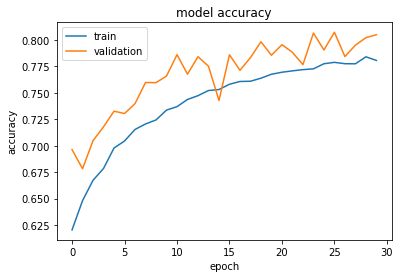

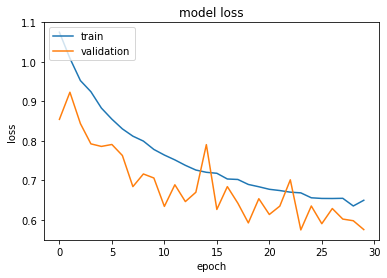

In [13]:
import matplotlib.pyplot as plt

print("model created")
# list all data in history
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
%%time
_, acc = model.evaluate(test_x, test_y, verbose=0, batch_size=1)
print('> %.3f' % (acc * 100.0))

> 81.900
CPU times: user 3.84 s, sys: 648 ms, total: 4.48 s
Wall time: 3.62 s
